<a href="https://colab.research.google.com/github/mryodo/sun.activity/blob/master/python/vpd/vspace/vpd_inital_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.optimize import fsolve
from math import *
from scipy.signal import argrelextrema
from imp import reload 


%matplotlib inline

#%matplotlib widget
#import vpdSolver
#reload(vpdSolver)

import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import pandas as pd

#%matplotlib widget

In [0]:
 def SystemSolve(d, dw, beta, dd, eps, init, n=10, N_grid=5000):
    L=n*np.pi
    t=np.linspace(0,L,N_grid)
    h=t[1]-t[0]

    l1=1+dd
    l2=1-dd
    xi=3*beta

    #init=np.array([
    #    2*0.7*np.cos(np.pi/6),
    #    0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1),
    #    2*0.5*np.cos(np.pi/3),
    #    -0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1)
    #])

    def f(t, x):
        return np.array([
            x[1],
            (1+dd-x[0]*x[0])*x[1]-(1-dw)*x[0]-beta*x[0]*x[0]*x[0]-eps*(x[0]-x[2])-d*(x[1]-x[3]),
            x[3],
            (1-dd-x[2]*x[2])*x[3]-(1+dw)*x[2]-beta*x[2]*x[2]*x[2]-eps*(x[2]-x[0])-d*(x[3]-x[1])
        ])
    
    def rk4(f, h, y0, t0):
        k1 = f(t0, y0)
        k2 = f(t0 + h / 2, y0 + h / 2 * k1)
        k3 = f(t0 + h / 2, y0 + h / 2 * k2)
        k4 = f(t0 + h, y0 + h * k3)
        return y0 + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6


    
    
    vanderpol=np.zeros((4, N_grid))

    t0=0
    y0=init
    for i in range(N_grid):
        tmp = t0 + h
        y = rk4(f, h, y0, t0)
        #if i<120:
        #    print(y)
        t0 = tmp
        vanderpol[:,i] = y0
        y0 = y

    x=vanderpol[0,:]
    dx=vanderpol[1, :]
    y=vanderpol[2,:]
    dy=vanderpol[3,:]
    
    #T=(np.mean(np.diff(t[argrelextrema(y, np.less)]))+np.mean(np.diff(t[argrelextrema(x, np.less)])))/2
    T=1
    W=2*np.pi/T
    p=int(round(T/h))
    
    return t, x, dx, y, dy, T, W, p


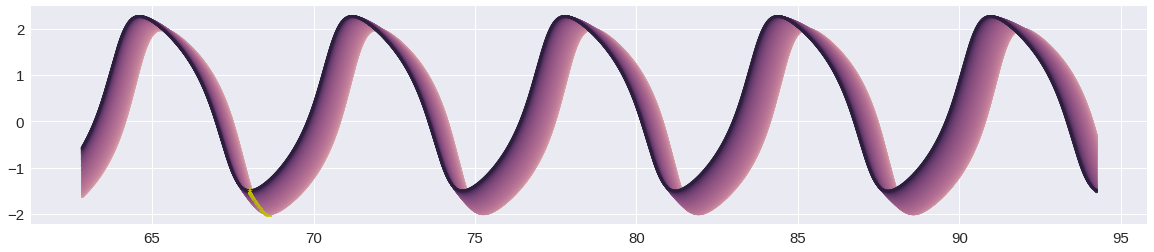

In [4]:
dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

lowest2=[]
avg2=[]
lowest2_diff=[]

init=np.array([
        2*0.7*np.cos(np.pi/6),
        0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1),
        2*0.5*np.cos(np.pi/3),
        -0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1)
    ])



with sns.cubehelix_palette(num2):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n, init=init)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:]-y[argrelextrema(y, np.less)][3:]))
        avg2.append(np.mean(x[1000:]))
    #plt.legend()

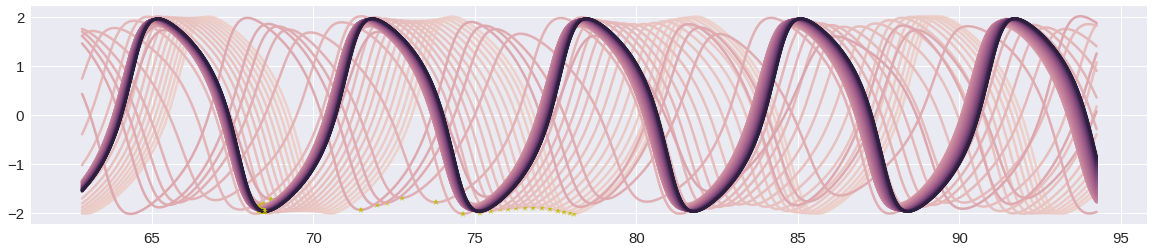

In [5]:
dw=0.2

d_series=np.linspace(0.00001, 1.0, 100)
num=d_series.shape[0]

lowest=[]
avg=[]

with sns.cubehelix_palette(num):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n, init=init)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        avg.append(np.mean(x[1000:]))
    #plt.legend()

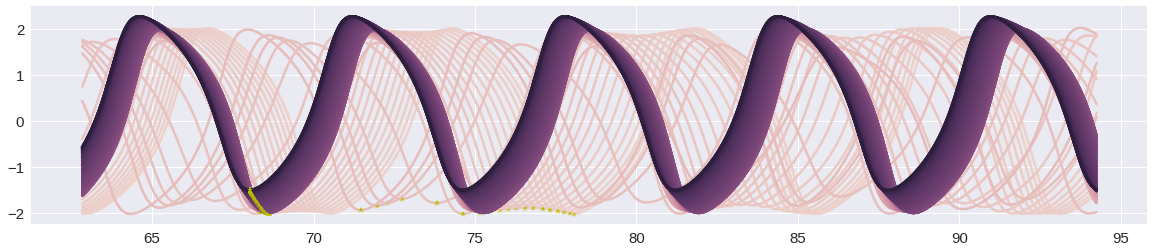

In [7]:
d_series=np.hstack([np.linspace(0.00001, 1.0, 100), np.logspace(0, 3, 100)])
num=d_series.shape[0]


lowest3x=[]
avg3=[]
lowest3y=[]

with sns.cubehelix_palette(num):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n, init=init)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest3x.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest3y.append(np.mean(y[argrelextrema(y, np.less)][3:]))
        #lowest3_diff.append(np.mean(x[argrelextrema(x, np.less)][3:]-y[argrelextrema(y, np.less)][3:]))
        avg3.append(np.mean(x[1000:]))
    #plt.legend()

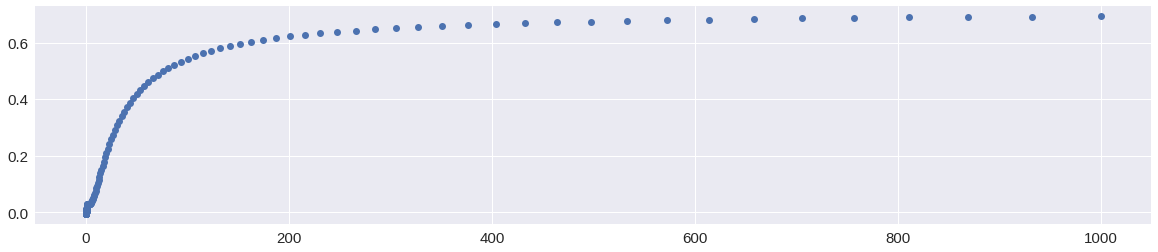

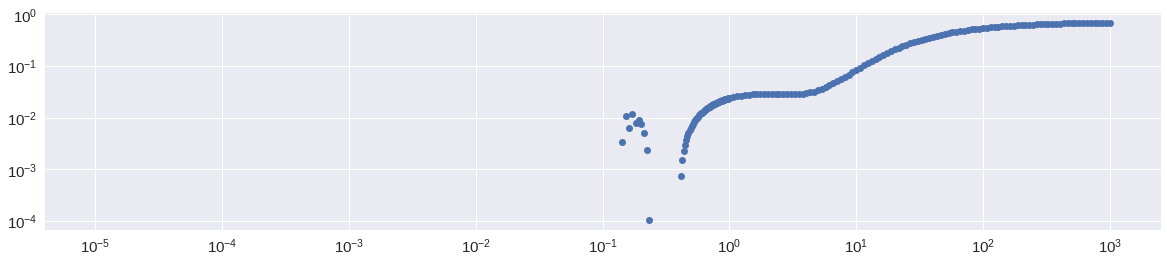

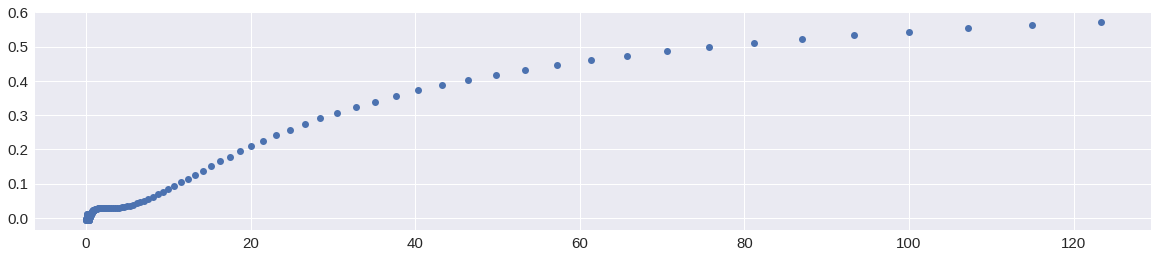

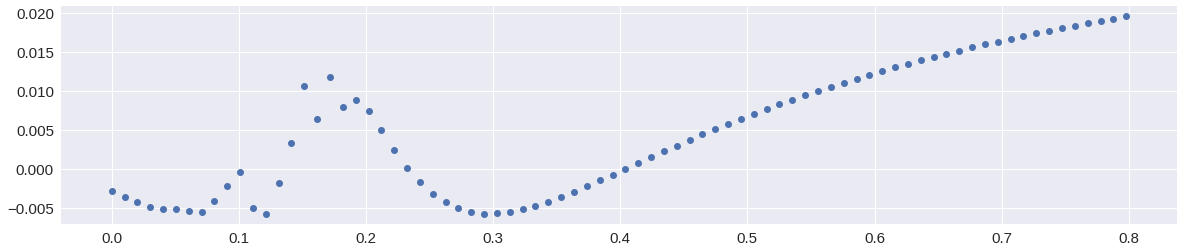

In [8]:
plt.figure(figsize=(20,4))
plt.plot(d_series, np.array(lowest3x)-np.array(lowest3y), 'o')

plt.figure(figsize=(20,4))
plt.loglog(d_series, np.array(lowest3x)-np.array(lowest3y), 'o')

plt.figure(figsize=(20,4))
plt.plot(d_series[:170], np.array(lowest3x)[:170]-np.array(lowest3y)[:170], 'o')

plt.figure(figsize=(20,4))
plt.plot(d_series[:80], np.array(lowest3x)[:80]-np.array(lowest3y)[:80], 'o')

In [9]:
init=np.array([
        2*0.7*np.cos(np.pi/6),
        0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1),
        2*0.5*np.cos(np.pi/3),
        -0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1)
    ])

print(init)

[ 1.21243557 -0.24589746  0.5        -0.41471143]


[ 1.21243557 -0.12294873  0.5        -0.20735572]


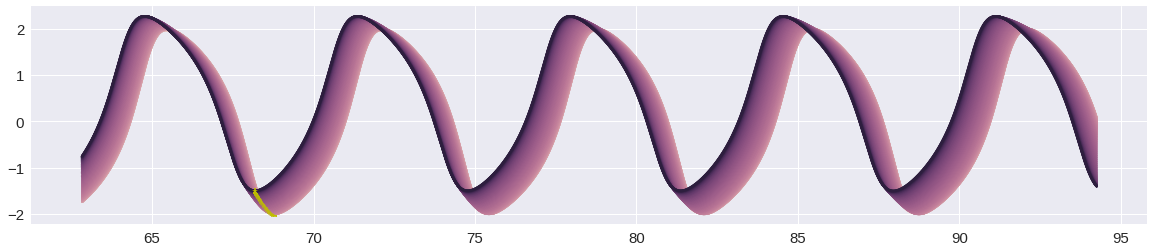

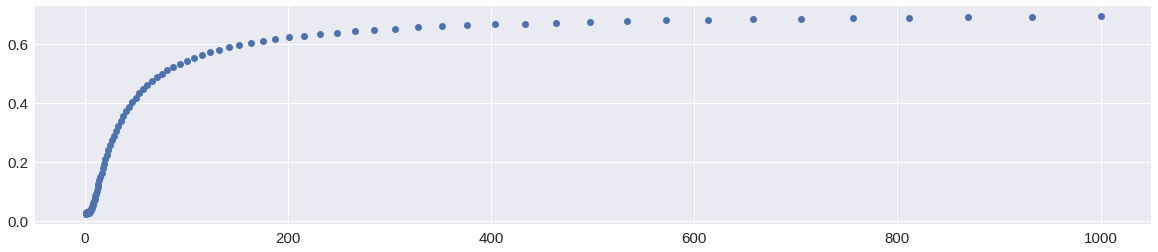

In [12]:
init=np.array([
        2*0.7*np.cos(np.pi/6),
        0.5*(0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
        2*0.5*np.cos(np.pi/3),
        0.5*(-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
    ])

print(init)

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

lowest2=[]
avg2=[]
lowest2_diff=[]

with sns.cubehelix_palette(num2):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:]-y[argrelextrema(y, np.less)][3:]))
        avg2.append(np.mean(x[1000:]))
    #plt.legend()
    
plt.figure(figsize=(20,4))
plt.plot(d_series2, lowest2_diff, 'o')

[ 1.21243557 -0.02458975  0.5        -0.04147114]


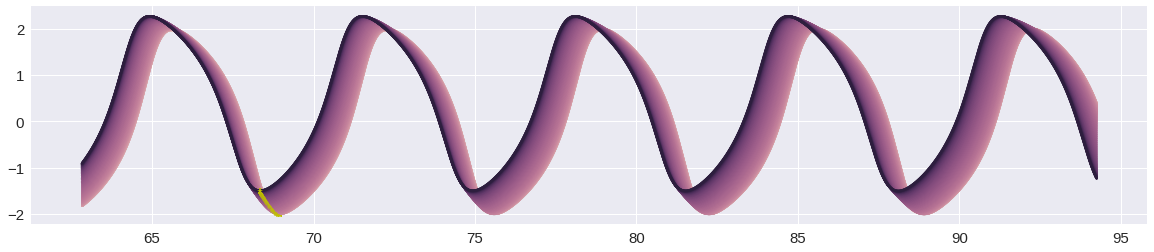

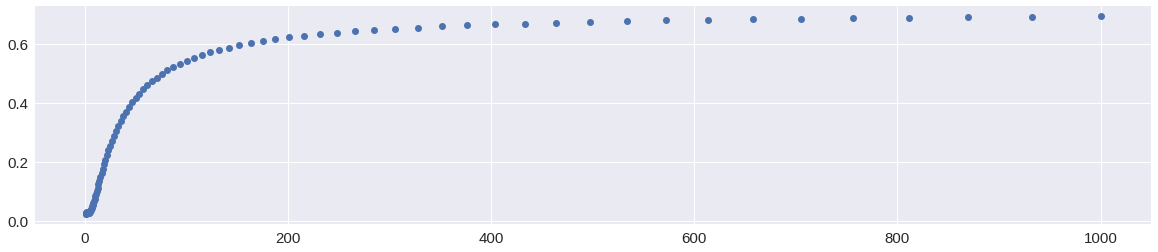

In [13]:
init=np.array([
        2*0.7*np.cos(np.pi/6),
        0.1*(0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
        2*0.5*np.cos(np.pi/3),
        0.1*(-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
    ])

print(init)

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

lowest2=[]
avg2=[]
lowest2_diff=[]

with sns.cubehelix_palette(num2):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:]-y[argrelextrema(y, np.less)][3:]))
        avg2.append(np.mean(x[1000:]))
    #plt.legend()
    
plt.figure(figsize=(20,4))
plt.plot(d_series2, lowest2_diff, 'o')

[ 2.42487113 -0.24589746  1.         -0.41471143]


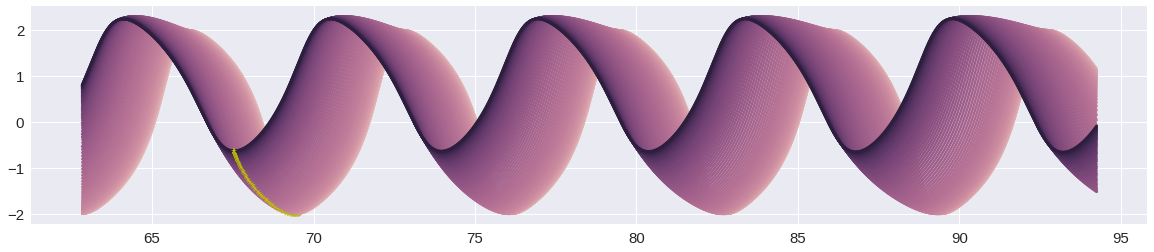

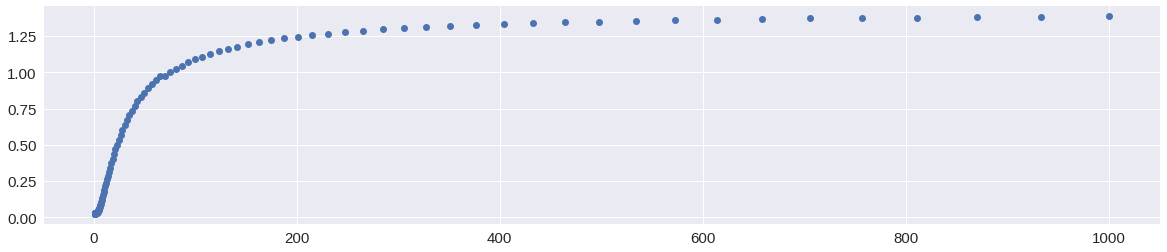

In [14]:
init=np.array([
        2*1.4*np.cos(np.pi/6),
        (0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
        2*1.*np.cos(np.pi/3),
        (-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
    ])

print(init)

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

lowest2=[]
avg2=[]
lowest2_diff=[]

with sns.cubehelix_palette(num2):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:])-np.mean(y[argrelextrema(y, np.less)][3:]))
        avg2.append(np.mean(x[1000:]))
    #plt.legend()
    
plt.figure(figsize=(20,4))
plt.plot(d_series2, lowest2_diff, 'o')

[ 1.73205081 -0.24589746  1.9        -0.41471143]


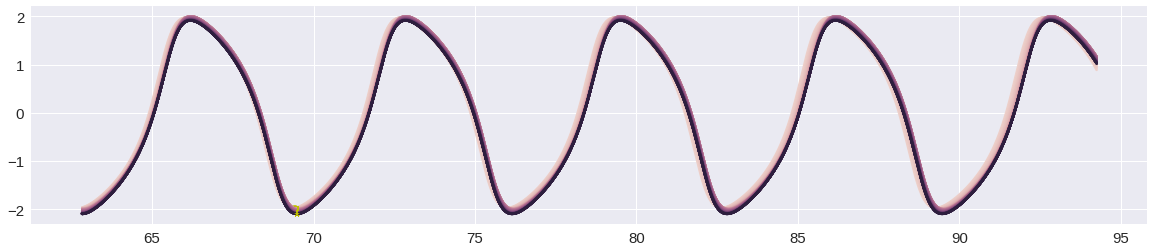

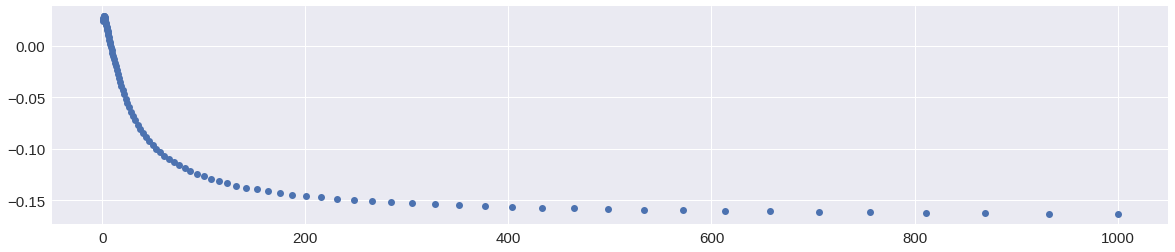

In [15]:
init=np.array([
        2*1.0*np.cos(np.pi/6),
        (0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
        2*1.9*np.cos(np.pi/3),
        (-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
    ])

print(init)

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

lowest2=[]
avg2=[]
lowest2_diff=[]

with sns.cubehelix_palette(num2):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:])-np.mean(y[argrelextrema(y, np.less)][3:]))
        avg2.append(np.mean(x[1000:]))
    #plt.legend()
    
plt.figure(figsize=(20,4))
plt.plot(d_series2, lowest2_diff, 'o')

[ 1.73205081 -0.24589746  0.5        -0.41471143]


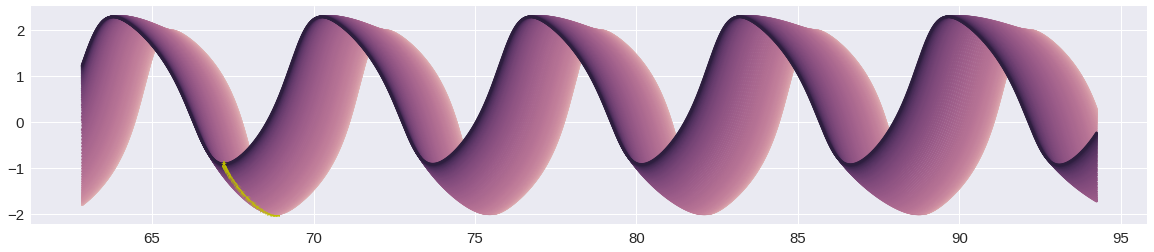

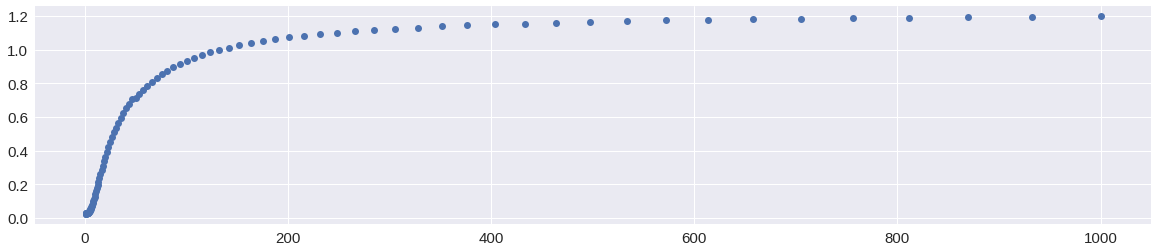

In [16]:
init=np.array([
        2*1.0*np.cos(np.pi/6),
        (0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
        2*0.5*np.cos(np.pi/3),
        (-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
    ])

print(init)

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

lowest2=[]
avg2=[]
lowest2_diff=[]

with sns.cubehelix_palette(num2):
    plt.figure(figsize=(20,4))
    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:])-np.mean(y[argrelextrema(y, np.less)][3:]))
        avg2.append(np.mean(x[1000:]))
    #plt.legend()
    
plt.figure(figsize=(20,4))
plt.plot(d_series2, lowest2_diff, 'o')

In [0]:
scales=[0.3, 0.7, 0.8, 1.0, 1.1, 1.2, 1.4]

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

plt.figure(figsize=(20,4))

for scale in scales:
    init=np.array([
            2*scale*np.cos(np.pi/6),
            (0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
            2*1.9*np.cos(np.pi/3),
            (-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
        ])

    #print(init)


    lowest2=[]
    #avg2=[]
    lowest2_diff=[]

    #with sns.cubehelix_palette(num2):

    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        #plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        #plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:])-np.mean(y[argrelextrema(y, np.less)][3:]))
        #avg2.append(np.mean(x[1000:]))
    #plt.legend()
    plt.plot(d_series2, lowest2_diff, 'o', label=str(2*scale*np.cos(np.pi/6)- 2*1.9*np.cos(np.pi/3)))
    print(scale)
plt.legend()

0.3


In [0]:
scales=[0.3, 0.7, 0.8, 1.0, 1.1, 1.2, 1.4]

dw=0.2
num=100

d_series2=np.logspace(0, 3, 100)
num2=d_series2.shape[0]

plt.figure(figsize=(20,4))

for scale in scales:
    init=np.array([
            2*scale*np.cos(np.pi/6),
            (0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
            2*1.9*np.cos(np.pi/3),
            (-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
        ])

    #print(init)


    lowest2=[]
    #avg2=[]
    lowest2_diff=[]

    #with sns.cubehelix_palette(num2):

    for i in range(num):
        d=d_series2[i]
        beta=0
        eps=0
        dd=0

        N_grid=int(max(d*100, 5000))
        n=30
        t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)
        #plt.plot(t[int(N_grid*2/3):], x[int(N_grid*2/3):], label=r'$\mu=$'+str(d))
        #C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        #    for i in range(N_grid)])
        #plt.plot(t[argrelextrema(x, np.less)][10], x[argrelextrema(x, np.less)][10], 'y*')
        lowest2.append(np.mean(x[argrelextrema(x, np.less)][3:]))
        lowest2_diff.append(np.mean(x[argrelextrema(x, np.less)][3:])-np.mean(y[argrelextrema(y, np.less)][3:]))
        #avg2.append(np.mean(x[1000:]))
    #plt.legend()
    plt.plot(d_series2, np.array(lowest2_diff)/(2*scale*np.cos(np.pi/6)- 2*1.9*np.cos(np.pi/3)), 'o', label=str(2*scale*np.cos(np.pi/6)- 2*1.9*np.cos(np.pi/3)))
    print(scale)
plt.legend()

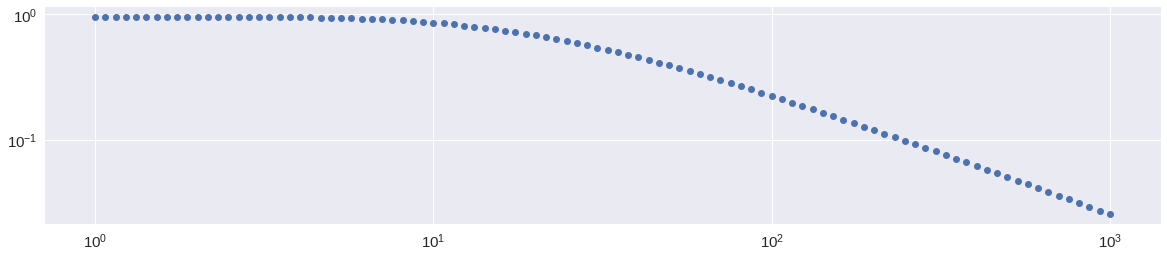

In [0]:
plt.figure(figsize=(20,4))
plt.loglog(d_series2, 1-np.array(lowest2_diff)/(2*scale*np.cos(np.pi/6)- 2*1.9*np.cos(np.pi/3)), 'o', label=str(2*scale*np.cos(np.pi/6)- 2*1.9*np.cos(np.pi/3)))

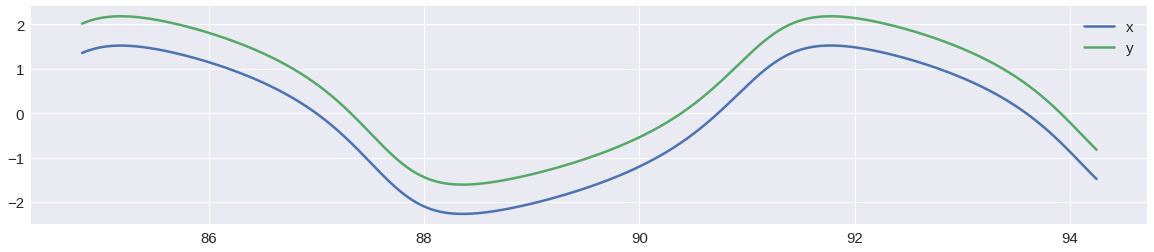

In [0]:
scale=0.7
beta=0
eps=0
dd=0

N_grid=int(max(d*100, 5000))
n=30
init=np.array([
            2*scale*np.cos(np.pi/6),
            (0.1*np.cos(np.pi/6)-0.7*np.sin(np.pi/6)*(-0.05+1)),
            2*1.9*np.cos(np.pi/3),
            (-0.05*np.cos(np.pi/3)-0.5*np.sin(np.pi/3)*(-0.1+1))
        ])

t, x, dx, y, dy, T, W, p=SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, init=init, N_grid=N_grid, n=n)

plt.figure(figsize=(20,4))
plt.plot(t[90000:], x[90000:], label='x')
plt.plot(t[90000:], y[90000:], label='y')
plt.legend()

In [0]:
d

1000.0

In [0]:
100000-100000/30

96666.66666666667